## 2. Edge Detection
### 2.1. Sobel Edge Detector

In [1]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

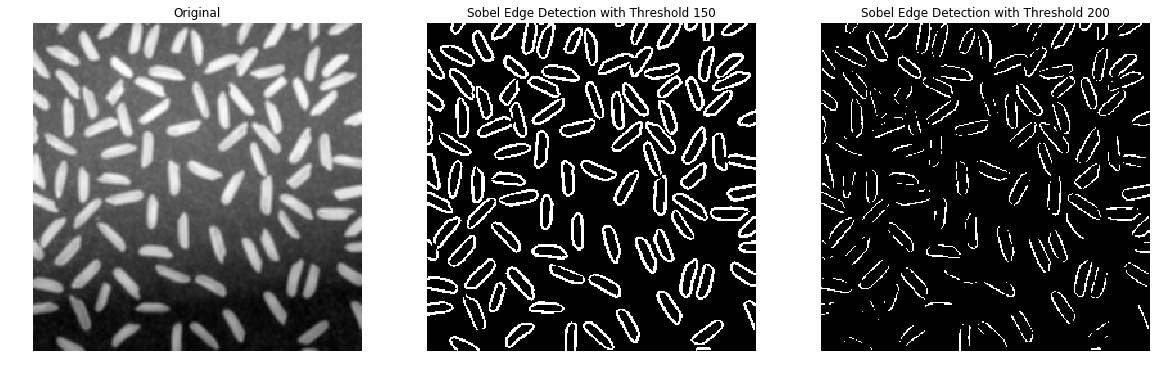

In [2]:
plt.figure(figsize=(20, 20))

# Original clean rice image (in Gray)
img = cv2.imread('./images/rice.png', cv2.IMREAD_GRAYSCALE)

# Sobel edge detection on rice image
img_sobel_x = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
img_sobel_y = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
img_sobel = cv2.magnitude(img_sobel_x, img_sobel_y)

# Image thresholding with 150 and 200 thresh
_, img_threshold_150 = cv2.threshold(img_sobel, 150, 255, cv2.THRESH_BINARY)
_, img_threshold_200 = cv2.threshold(img_sobel, 200, 255, cv2.THRESH_BINARY)

plt.subplot(131), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.axis('off')
plt.subplot(132), plt.imshow(img_threshold_150, cmap='gray')
plt.title('Sobel Edge Detection with Threshold 150'), plt.axis('off')
plt.subplot(133), plt.imshow(img_threshold_200, cmap='gray')
plt.title('Sobel Edge Detection with Threshold 200'), plt.axis('off')

# Display second set of images
plt.show()

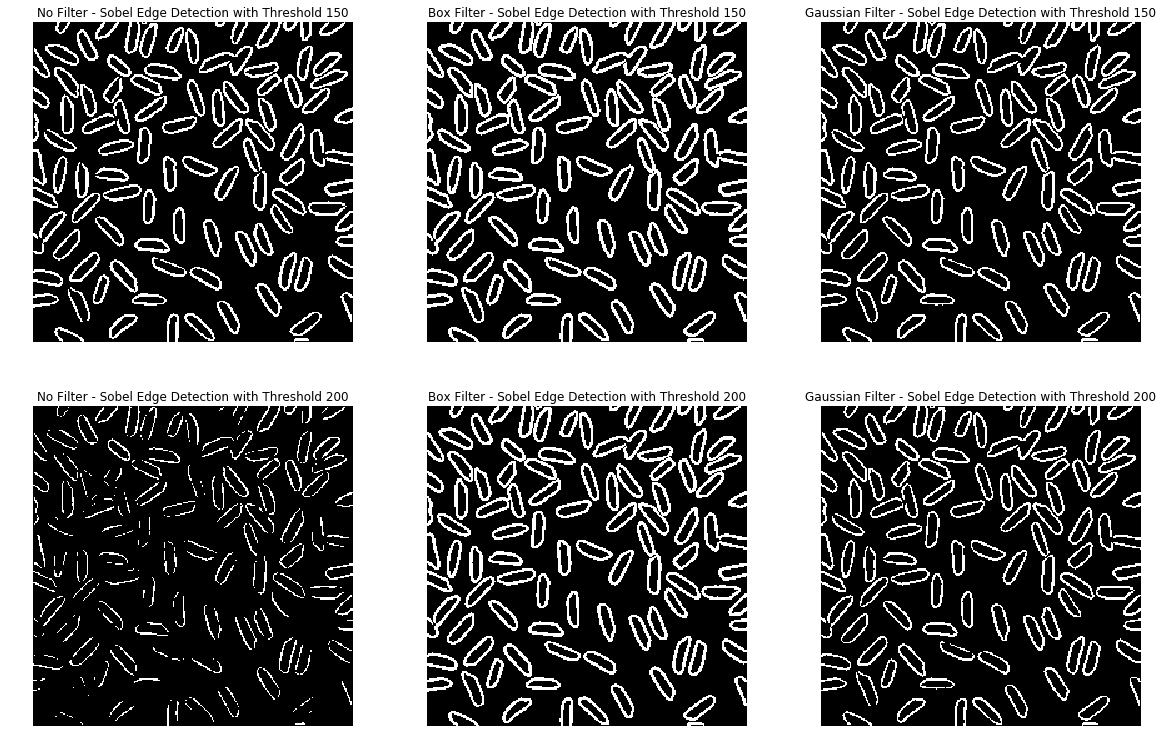

In [3]:
plt.figure(figsize=(20, 20))

# Sharpen rice image using Box Filter 5x5
img_box = cv2.boxFilter(img, -1, (5, 5))
img_box_sharp = (img + (img - img_box))

# Sharpen rice image using Gaussian Filter 5x5 with variance 2
img_gaussian = cv2.GaussianBlur(img, (5, 5), math.sqrt(2))
img_gaussian_sharp = (img + (img - img_gaussian))

# Sobel edge detection on Box filter rice image
img_box_sobel_x = cv2.Sobel(img_box_sharp, cv2.CV_32F, 1, 0, ksize=3)
img_box_sobel_y = cv2.Sobel(img_box_sharp, cv2.CV_32F, 0, 1, ksize=3)
img_box_sobel = cv2.magnitude(img_box_sobel_x, img_box_sobel_y)

# Sobel edge detection on Gaussian filter rice image
img_gaussian_sobel_x = cv2.Sobel(img_gaussian_sharp, cv2.CV_32F, 1, 0, ksize=3)
img_gaussian_sobel_y = cv2.Sobel(img_gaussian_sharp, cv2.CV_32F, 0, 1, ksize=3)
img_gaussian_sobel = cv2.magnitude(img_gaussian_sobel_x, img_gaussian_sobel_y)

# Image thresholding on Box filtered image with 150 and 200 thresh
_, img_box_threshold_150 = cv2.threshold(img_box_sobel, 150, 255, cv2.THRESH_BINARY)
_, img_box_threshold_200 = cv2.threshold(img_box_sobel, 200, 255, cv2.THRESH_BINARY)

# Image thresholding on Gaussian filtered image with 150 and 200 thresh
_, img_gaussian_threshold_150 = cv2.threshold(img_gaussian_sobel, 150, 255, cv2.THRESH_BINARY)
_, img_gaussian_threshold_200 = cv2.threshold(img_gaussian_sobel, 200, 255, cv2.THRESH_BINARY)

plt.subplot(331), plt.imshow(img_threshold_150, cmap='gray')
plt.title('No Filter - Sobel Edge Detection with Threshold 150'), plt.axis('off')
plt.subplot(332), plt.imshow(img_box_threshold_150, cmap='gray')
plt.title('Box Filter - Sobel Edge Detection with Threshold 150'), plt.axis('off')
plt.subplot(333), plt.imshow(img_box_threshold_200, cmap='gray')
plt.title('Gaussian Filter - Sobel Edge Detection with Threshold 150'), plt.axis('off')

plt.subplot(334), plt.imshow(img_threshold_200, cmap='gray')
plt.title('No Filter - Sobel Edge Detection with Threshold 200'), plt.axis('off')
plt.subplot(335), plt.imshow(img_gaussian_threshold_150, cmap='gray')
plt.title('Box Filter - Sobel Edge Detection with Threshold 200'), plt.axis('off')
plt.subplot(336), plt.imshow(img_gaussian_threshold_200, cmap='gray')
plt.title('Gaussian Filter - Sobel Edge Detection with Threshold 200'), plt.axis('off')

# Display all images
plt.show()

From the results obtained, we can see with confidence that sharpening the base image prior to using Sobel edge detection improves the final results, especially when using a threshold value of 200. As we can see, the edges are more defined, and when using a threshold of 200, they are also more complete.

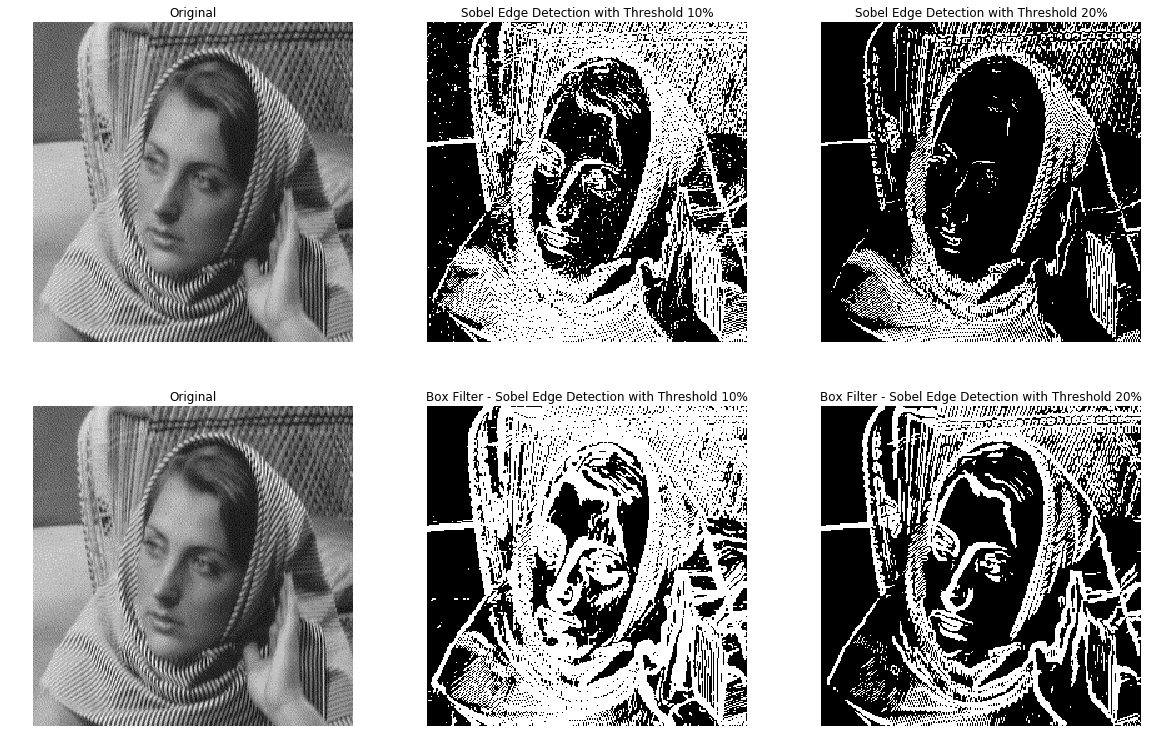

In [4]:
plt.figure(figsize=(20, 20))

# Original clean woman image (in GRAY)
img = cv2.imread('./images/woman.png', cv2.IMREAD_GRAYSCALE)

# Denoise woman image using Box Filter 3x3
img_box = cv2.boxFilter(img, -1, (3, 3))

# Sobel edge detection on woman image
img_sobel_x = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=3)
img_sobel_y = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=3)
img_sobel = cv2.magnitude(img_sobel_x, img_sobel_y)

# Sobel edge detection on Box filtered woman image
img_box_sobel_x = cv2.Sobel(img_box, cv2.CV_32F, 1, 0, ksize=3)
img_box_sobel_y = cv2.Sobel(img_box, cv2.CV_32F, 0, 1, ksize=3)
img_box_sobel = cv2.magnitude(img_box_sobel_x, img_box_sobel_y)

# Image thresholding with 10% and 20% of max filter response thresh
max_pix = np.max(img_sobel)
_, img_threshold_10 = cv2.threshold(img_sobel, 0.1 * max_pix, 255, cv2.THRESH_BINARY)
_, img_threshold_20 = cv2.threshold(img_sobel, 0.2 * max_pix, 255, cv2.THRESH_BINARY)

# Box filtered image thresholding with 10% and 20% of max filter response thresh
max_box_pix = np.max(img_box_sobel)
_, img_box_threshold_10 = cv2.threshold(img_box_sobel, 0.1 * max_box_pix, 255, cv2.THRESH_BINARY)
_, img_box_threshold_20 = cv2.threshold(img_box_sobel, 0.2 * max_box_pix, 255, cv2.THRESH_BINARY)

plt.subplot(331), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.axis('off')
plt.subplot(332), plt.imshow(img_threshold_10, cmap='gray')
plt.title('Sobel Edge Detection with Threshold 10%'), plt.axis('off')
plt.subplot(333), plt.imshow(img_threshold_20, cmap='gray')
plt.title('Sobel Edge Detection with Threshold 20%'), plt.axis('off')

plt.subplot(334), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.axis('off')
plt.subplot(335), plt.imshow(img_box_threshold_10, cmap='gray')
plt.title('Box Filter - Sobel Edge Detection with Threshold 10%'), plt.axis('off')
plt.subplot(336), plt.imshow(img_box_threshold_20, cmap='gray')
plt.title('Box Filter - Sobel Edge Detection with Threshold 20%'), plt.axis('off')

# Display second set of images
plt.show()

As can be seen by the results above, denoising the images significantly improves the results of Sobel edge detection. By denoising, we remove unwanted pixels that linger around the edges, allowing a less cluttered area when calculating the edge's gradient. It can be very well seen in the images that are using a threshold value of 20%, where the denoised image has much more prominent edges following the woman's facial features compared to those of the original image.